In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#basic lib
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
#Load clean dataset
data = pd.read_csv("/content/drive/MyDrive/Quân_ITDSIU20094/Data mining/PROJECT/wind_dataset_clean.csv")
# Display the first few rows of the dataset
print(data.head())

         DATE   WIND       IND      RAIN     IND.1     T.MAX     IND.2  \
0  1961-01-01  13.67 -0.333699 -0.420323 -0.310259 -0.829091 -0.389995   
1  1961-01-02  11.50 -0.333699  0.826974 -0.310259 -1.321138 -0.389995   
2  1961-01-03  11.25 -0.333699 -0.369413 -0.310259 -1.684825 -0.389995   
3  1961-01-04   8.63 -0.333699 -0.420323 -0.310259 -1.663432 -0.389995   
4  1961-01-05  11.92 -0.333699  2.176091 -0.310259 -1.321138  0.469785   

      T.MIN   T.MIN.G  Year  Month  
0 -0.617700 -0.686374  1961      1  
1 -0.504631 -0.301580  1961      1  
2 -1.341341 -0.594757  1961      1  
3 -1.363955 -1.089492  1961      1  
4 -1.793617 -1.877404  1961      1  


## WIND

In [18]:
def convert_wind_norminal(data):
    wind_categories = []
    for i in data:
        if i < 1:
            wind_categories.append('Calm')
        elif 1 <= i < 5:
            wind_categories.append('Light Air')
        elif 5 <= i < 11:
            wind_categories.append('Light Breeze')
        elif 11 <= i < 19:
            wind_categories.append('Gentle Breeze')
        elif 19 <= i < 28:
            wind_categories.append('Moderate Breeze')
        elif 28 <= i < 38:
            wind_categories.append('Fresh Breeze')
        elif 38 <= i < 49:
            wind_categories.append('Strong Breeze')
        elif 49 <= i < 61:
            wind_categories.append('Near Gale')
        elif 61 <= i < 74:
            wind_categories.append('Gale')
        elif 74 <= i < 88:
            wind_categories.append('Strong Gale')
        elif 88 <= i < 102:
            wind_categories.append('Storm')
        elif 102 <= i < 117:
            wind_categories.append('Violent Storm')
        else:
            wind_categories.append('Hurricane')
    return wind_categories

In [19]:
data['WIND']=convert_wind_norminal(data['WIND'])

In [20]:
data['WIND'].unique()

array(['Gentle Breeze', 'Light Breeze', 'Light Air', 'Moderate Breeze',
       'Calm'], dtype=object)

#RAIN

In [21]:
def convert_rain_norminal(data):
  data_encode=[]
  for i in data:
    if i<2.5:
      data_encode.append('Slight')
    elif i>=2.5 and i<10:
      data_encode.append('Moderate')
    elif i>=10 and i<50:
      data_encode.append('Heavy')
    else:
      data_encode.append('Violence')
  return data_encode

In [22]:
data['RAIN']=convert_rain_norminal(data['RAIN'])

In [23]:
data['RAIN'].unique()

array(['Slight', 'Moderate', 'Heavy'], dtype=object)

# Visualize

In [24]:
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,Year,Month
0,1961-01-01,Gentle Breeze,-0.333699,Slight,-0.310259,-0.829091,-0.389995,-0.617700,-0.686374,1961,1
1,1961-01-02,Gentle Breeze,-0.333699,Slight,-0.310259,-1.321138,-0.389995,-0.504631,-0.301580,1961,1
2,1961-01-03,Gentle Breeze,-0.333699,Slight,-0.310259,-1.684825,-0.389995,-1.341341,-0.594757,1961,1
3,1961-01-04,Light Breeze,-0.333699,Slight,-0.310259,-1.663432,-0.389995,-1.363955,-1.089492,1961,1
4,1961-01-05,Gentle Breeze,-0.333699,Slight,-0.310259,-1.321138,0.469785,-1.793617,-1.877404,1961,1


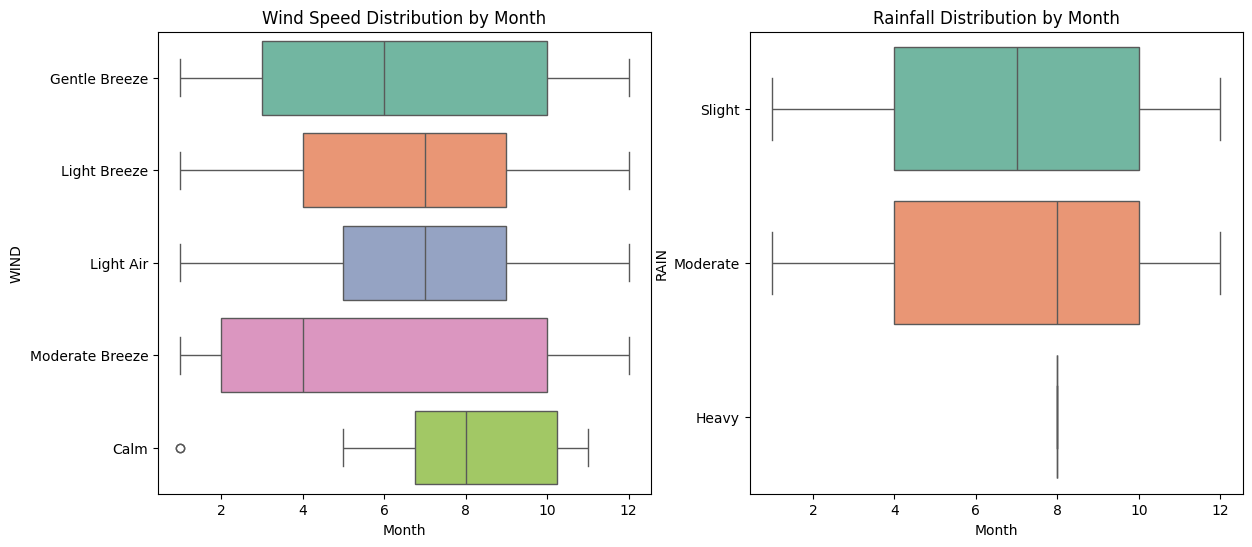

In [38]:
# Visualization for Wind and Rain distribution across Month, 2 color for wind and rain, please

import matplotlib.pyplot as plt

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of wind speed across months for each wind category
sns.boxplot(x="Month", y="WIND", hue="WIND", data=data, palette="Set2", ax=ax1)
ax1.set_title("Wind Speed Distribution by Month")

# Plot the distribution of rainfall across months for each rain category
sns.boxplot(x="Month", y="RAIN", hue="RAIN", data=data, palette="Set2", ax=ax2)
ax2.set_title("Rainfall Distribution by Month")

# Show the plot
plt.show()

In [39]:
data = data.drop('Year', axis=1)
data = data.drop('Month', axis=1)

# Export CSV file

In [40]:
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,Gentle Breeze,-0.333699,Slight,-0.310259,-0.829091,-0.389995,-0.617700,-0.686374
1,1961-01-02,Gentle Breeze,-0.333699,Slight,-0.310259,-1.321138,-0.389995,-0.504631,-0.301580
2,1961-01-03,Gentle Breeze,-0.333699,Slight,-0.310259,-1.684825,-0.389995,-1.341341,-0.594757
3,1961-01-04,Light Breeze,-0.333699,Slight,-0.310259,-1.663432,-0.389995,-1.363955,-1.089492
4,1961-01-05,Gentle Breeze,-0.333699,Slight,-0.310259,-1.321138,0.469785,-1.793617,-1.877404


In [41]:
data.to_csv('/content/drive/MyDrive/Quân_ITDSIU20094/Data mining/PROJECT/wind_data.csv', index=False)